In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

dev = "cpu"

NEURON_NUM = 64
TRAIN_DATA = 16
DIM=1

In [2]:
class nnm(nn.Module):
    def __init__(self, N):
        super().__init__()
        self.width = N
        self.hidden_layer = nn.Linear(DIM, N)
        self.output_layer = nn.Linear(N, 1, bias=False)

    def forward(self, x):
        hidden = torch.sigmoid(self.hidden_layer(x))
        output = self.output_layer(hidden)
        return output/self.width
    
net = nnm(NEURON_NUM)
net.to(dev)

NUM_DATA = 200000
DELTA = 0.5
f = lambda x: torch.sin(3*x)
# y_train = torch.rand(NUM_DATA, device=dev).round().unsqueeze(1)
# x_train = torch.randn((NUM_DATA, DIM), device=dev)*(1+DELTA)*(y_train==1) + torch.randn((NUM_DATA, DIM), device=dev)*(1-DELTA)*(y_train==0)
x_train = torch.rand(NUM_DATA, device=dev).unsqueeze(1)
y_train = f(x_train)+torch.randn(NUM_DATA, device=dev).unsqueeze(1)*0.2

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=10)

BURN_IN = 10000
TOTAL_EPOCH = 20000

In [3]:
a=0.1
hidden_layer_weight = []
hidden_layer_bias = []
output_layer_weight = []
for epoch in range(TOTAL_EPOCH):
    y_pred = net(x_train[epoch:epoch+1])
    loss = criterion(y_pred, y_train[epoch:epoch+1])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    net.hidden_layer.weight.data += torch.randn(NEURON_NUM, 1, device=dev)*a
    net.hidden_layer.bias.data += torch.randn(NEURON_NUM, device=dev)*a
    net.output_layer.weight.data += torch.randn(1, NEURON_NUM, device=dev)*a

    if epoch > BURN_IN and epoch%100 ==0:
        hidden_layer_weight.append(net.hidden_layer.weight.data.clone())
        hidden_layer_bias.append(net.hidden_layer.bias.data.clone())
        output_layer_weight.append(net.output_layer.weight.data.clone())
    
FINAL_WIDTH = NEURON_NUM * len(hidden_layer_bias)
net_mean =nnm(FINAL_WIDTH)
net_mean.to(dev)
net_mean.hidden_layer.weight.data = torch.cat(hidden_layer_weight, dim=0)
net_mean.hidden_layer.bias.data = torch.cat(hidden_layer_bias, dim=0)
net_mean.output_layer.weight.data = torch.cat(output_layer_weight, dim=1)

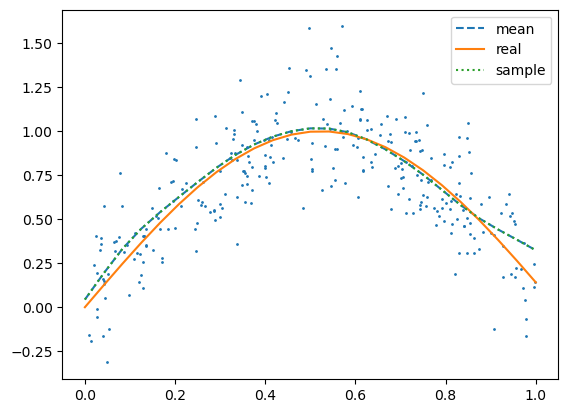

In [11]:
x_test = torch.linspace(0, 1, 25, device=dev).unsqueeze(1)
y_pred_mean = net_mean(x_test)
plt.scatter(x_train.cpu()[0:300], y_train.cpu()[0:300], s=1)
plt.plot(x_test.cpu(), y_pred.detach().cpu(), label='mean', linestyle='dashed')
plt.plot(x_test.cpu(), f(x_test.cpu()), label='real')

i=98
net = nnm(NEURON_NUM)
net.hidden_layer.weight.data = hidden_layer_weight[i]
net.hidden_layer.bias.data = hidden_layer_bias[i]
net.output_layer.weight.data = output_layer_weight[i]
x_test = torch.linspace(0, 1, 25, device=dev).unsqueeze(1)
y_pred = net(x_test)
plt.plot(x_test.cpu(), y_pred.detach().cpu(), label='sample', linestyle='dotted')
plt.legend()
plt.show()

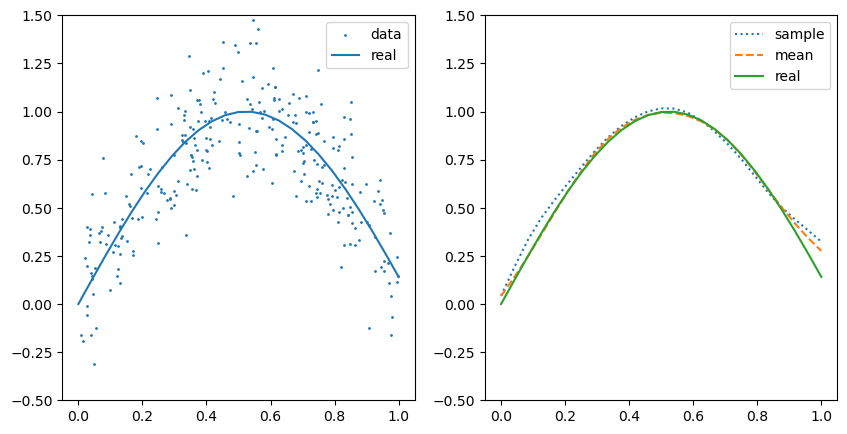

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_train.cpu()[0:300], y_train.cpu()[0:300], s=1, label='data')
ax[0].plot(x_test.cpu(), f(x_test.cpu()), label='real')
ax[1].plot(x_test.cpu(), y_pred.detach().cpu(), label='sample', linestyle='dotted')
ax[1].plot(x_test.cpu(), y_pred_mean.detach().cpu(), label='mean', linestyle='dashed')
ax[1].plot(x_test.cpu(), f(x_test.cpu()), label='real')
# Set the two ax to have the same y-axis
ax[0].set_ylim([-0.5, 1.5])
ax[1].set_ylim([-0.5, 1.5])
ax[0].legend()
ax[1].legend()
plt.show()

In [5]:
x_test = torch.rand(1000, device=dev).unsqueeze(1)
y_test = torch.sin(3*x_test)+torch.randn(1000, device=dev).unsqueeze(1)*0.2
loss=[]
for i in range(0,99):
    net = nnm(NEURON_NUM)
    net.hidden_layer.weight.data = hidden_layer_weight[i]
    net.hidden_layer.bias.data = hidden_layer_bias[i]
    net.output_layer.weight.data = output_layer_weight[i]
    y_pred = net(x_test)
    loss.append(criterion(y_test, y_pred).data.item())
loss = np.array(loss)
print(loss.mean())

y_pred=net_mean(x_test)
loss = criterion(y_test,y_pred).data.item()
print(loss)

x_test = x_train[0:2000]
y_test = y_train[0:2000]
loss=[]
for i in range(0,99):
    net = nnm(NEURON_NUM)
    net.hidden_layer.weight.data = hidden_layer_weight[i]
    net.hidden_layer.bias.data = hidden_layer_bias[i]
    net.output_layer.weight.data = output_layer_weight[i]
    y_pred = net(x_test)
    loss.append(criterion(y_test, y_pred).data.item())
loss = np.array(loss)
print(loss.mean())

y_pred=net_mean(x_test)
loss = criterion(y_test,y_pred).data.item()
print(loss)

0.04834882839761599
0.0397791862487793
0.051051616066634053
0.042542409151792526


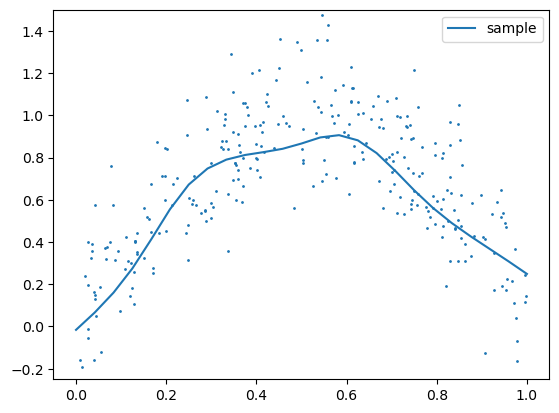

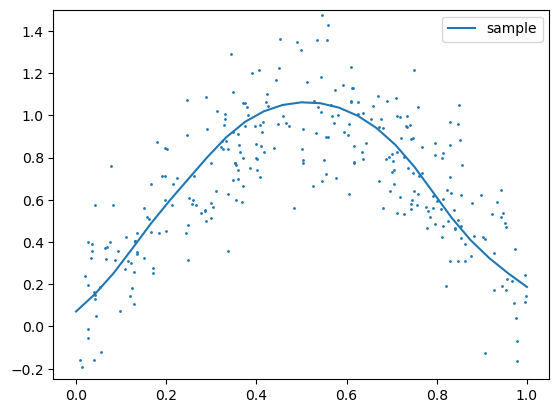

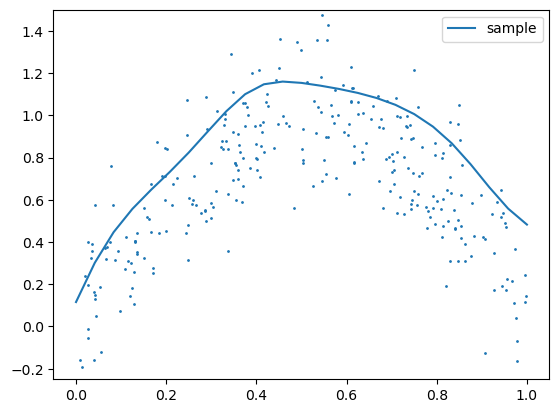

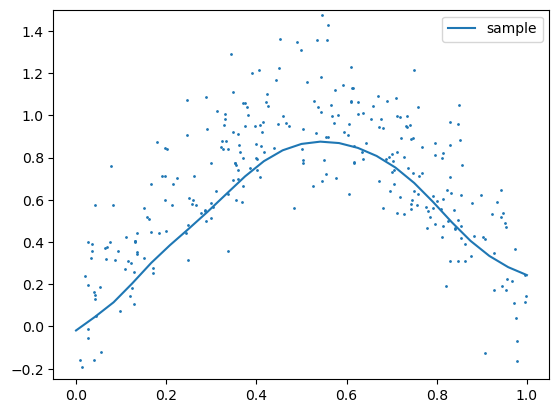

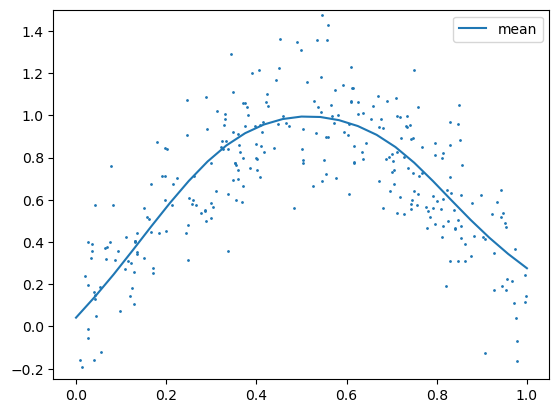

In [6]:
i=50
plt.scatter(x_train.cpu()[0:300], y_train.cpu()[0:300], s=1)
net = nnm(NEURON_NUM)
net.hidden_layer.weight.data = hidden_layer_weight[i]
net.hidden_layer.bias.data = hidden_layer_bias[i]
net.output_layer.weight.data = output_layer_weight[i]
x_test = torch.linspace(0, 1, 25, device=dev).unsqueeze(1)
y_pred = net(x_test)
plt.plot(x_test.cpu(), y_pred.detach().cpu(), label='sample')
plt.legend()
plt.ylim(-0.25, 1.5)
plt.show()

i=80
plt.scatter(x_train.cpu()[0:300], y_train.cpu()[0:300], s=1)
net = nnm(NEURON_NUM)
net.hidden_layer.weight.data = hidden_layer_weight[i]
net.hidden_layer.bias.data = hidden_layer_bias[i]
net.output_layer.weight.data = output_layer_weight[i]
x_test = torch.linspace(0, 1, 25, device=dev).unsqueeze(1)
y_pred = net(x_test)
plt.plot(x_test.cpu(), y_pred.detach().cpu(), label='sample')
plt.legend()
plt.ylim(-0.25, 1.5)
plt.show()

i=30
plt.scatter(x_train.cpu()[0:300], y_train.cpu()[0:300], s=1)
net = nnm(NEURON_NUM)
net.hidden_layer.weight.data = hidden_layer_weight[i]
net.hidden_layer.bias.data = hidden_layer_bias[i]
net.output_layer.weight.data = output_layer_weight[i]
x_test = torch.linspace(0, 1, 25, device=dev).unsqueeze(1)
y_pred = net(x_test)
plt.plot(x_test.cpu(), y_pred.detach().cpu(), label='sample')
plt.legend()
plt.ylim(-0.25, 1.5)
plt.show()

i=10
plt.scatter(x_train.cpu()[0:300], y_train.cpu()[0:300], s=1)
net = nnm(NEURON_NUM)
net.hidden_layer.weight.data = hidden_layer_weight[i]
net.hidden_layer.bias.data = hidden_layer_bias[i]
net.output_layer.weight.data = output_layer_weight[i]
x_test = torch.linspace(0, 1, 25, device=dev).unsqueeze(1)
y_pred = net(x_test)
plt.plot(x_test.cpu(), y_pred.detach().cpu(), label='sample')
plt.legend()
plt.ylim(-0.25, 1.5)
plt.show()

#%%
y_pred = net_mean(x_test)
plt.scatter(x_train.cpu()[0:300], y_train.cpu()[0:300], s=1)
plt.plot(x_test.cpu(), y_pred.detach().cpu(), label='mean')
plt.legend()
plt.ylim(-0.25, 1.5)
plt.show()

#%%
def plot(i):
    net = nnm(NEURON_NUM)
    net.hidden_layer.weight.data = hidden_layer_weight[i]
    net.hidden_layer.bias.data = hidden_layer_bias[i]
    net.output_layer.weight.data = output_layer_weight[i]
    x_test = torch.linspace(0, 1, 100, device=dev).unsqueeze(1)
    y_pred = net(x_test)
    plt.scatter(x_train.cpu(), y_train.cpu())
    plt.plot(x_test.cpu(), y_pred.detach().cpu())
    plt.show()
    return